In [1]:
import pandas as pd
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition

In [2]:
data = pd.read_csv("../kc_house_data.csv")
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890.0,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715.0,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060.0,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050.0,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890.0,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
# selection des colonnes à prendre en compte
data = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

data = data.fillna(data.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890.0,1530,2001,0,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715.0,0,1995,0,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060.0,0,1963,0,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050.0,730,1960,0,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890.0,0,2003,0,47.3684,-122.031,2390,7570


# Normalisation des données

In [4]:
# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Réduction du nombre de viariable de 18 à 12 avec PCA

In [5]:
# Calcul des composantes principales
n_comp_init = 18
pca = decomposition.PCA(n_components=n_comp_init)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

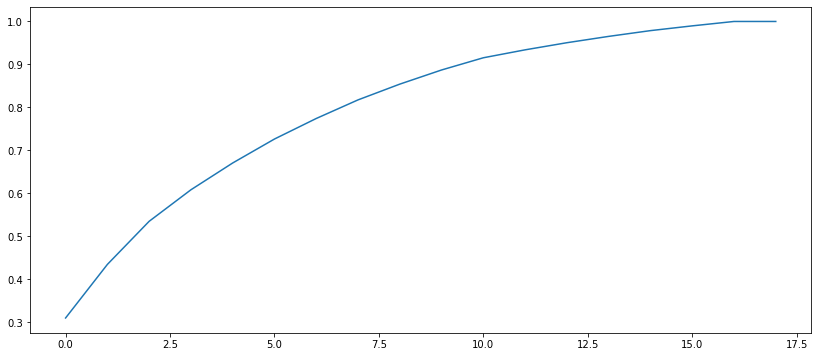

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
axes.plot(np.cumsum(pca.explained_variance_ratio_)) # On voit que on peut utiliser 11 variables pour conserver 95% dela variabilité
fig.savefig('dimension2.png', transparent = True)

In [7]:
n_comp = 12
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)
Y = pca.transform(X_scaled)

In [8]:
print(Y.shape)

(21613, 12)


# Réduction du nombre d'individu 21 613 à 300 avec K-Means

In [9]:
# Nombre de clusters souhaités
n_clust300 = 300

In [10]:
# Clustering par K-means
km300 = KMeans(n_clusters=n_clust300)
km300.fit(Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=300, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

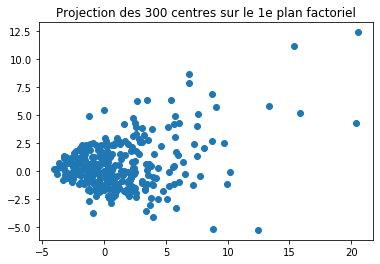

In [11]:
# Affichage des positions des 2000 centres de classes sur le premier plan factoriel
plt.figure()
centroids300 = km300.cluster_centers_
pca300 = decomposition.PCA(n_components=3).fit(Y)
centroids_projected300 = pca300.transform(centroids300)
plt.scatter(centroids_projected300[:,0],centroids_projected300[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids300)))
plt.show()

# Classification hiérarchique sur les 300 individus trouvés

In [12]:
# Clustering hiérarchique
Z = linkage(centroids300, 'ward')

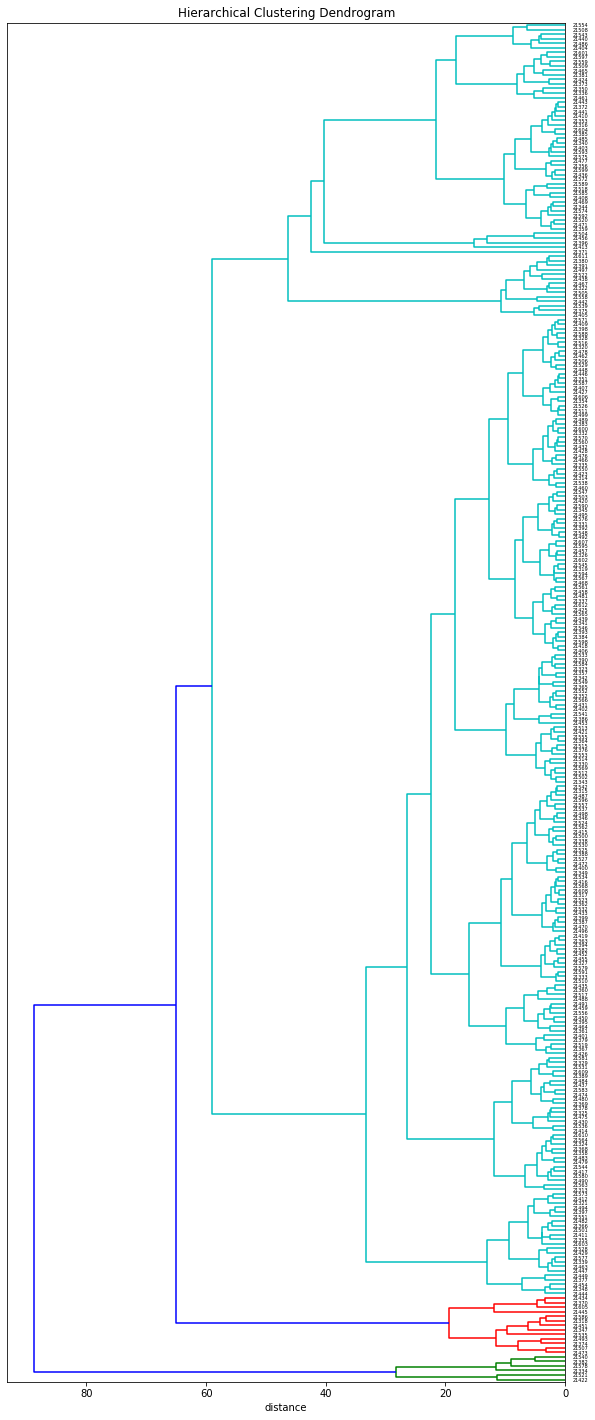

In [13]:
# Affichage du dendrogramme
plot_dendrogram(Z, names)

In [14]:
# Coupage du dendrogramme en 12 clusters
clustersss = fcluster(Z, 3, criterion='maxclust')
#clusters = fcluster(Z, 159, criterion='distance') # ligne équivalente à la précédente
clustersss

array([3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3], d

In [21]:
# Comparaison des clusters trouvés avec les classification
bedrooms = data['sqft_living']
courses = pd.DataFrame({"sqft_living": bedrooms, "cluster": clusters})
#print(courses)
print(courses.pivot_table(index="sqft_living", columns="cluster", aggfunc=len, fill_value=0))

NameError: name 'clusters' is not defined

# détermination du nombre de cluster idéal avec la méthode Elbow (méthode du coude)

In [15]:
inertia = []
k_range = range(1, 10)
for k in k_range:
    model = KMeans(n_clusters=k).fit(centroids300)
    inertia.append(model.inertia_)

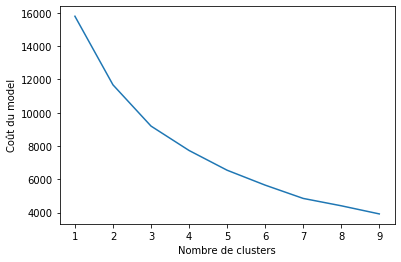

In [16]:
plt.plot(k_range, inertia)
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût du model')
plt.show()

# Divisions des individus en six classes avec Kmeans

In [17]:
# Nombre de clusters souhaités
n_clust = 3

In [18]:
# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(centroids300)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
# Récupération des clusters attribués à chaque individu
pca3 = decomposition.PCA(n_components=6).fit(Y)
Y_projected = pca3.transform(Y)
clusters = km.predict(Y)

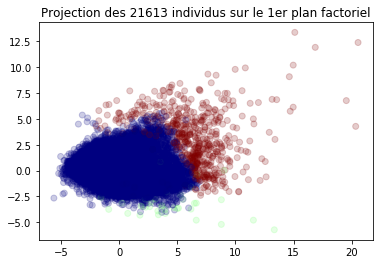

In [40]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1er plan factoriel".format(Y_projected.shape[0]))
plt.show(block=False)

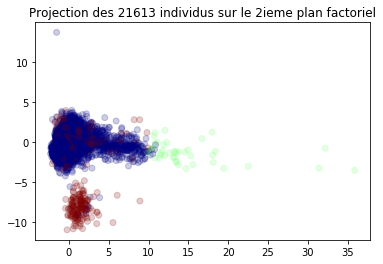

In [21]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
plt.scatter(Y_projected[:, 2], Y_projected[:, 3], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 2ieme plan factoriel".format(Y_projected.shape[0]))
plt.show(block=False)

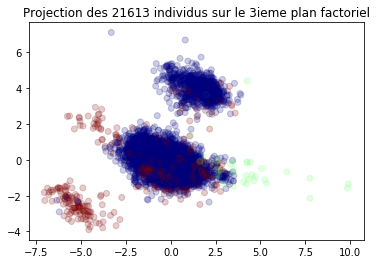

In [22]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
plt.scatter(Y_projected[:, 4], Y_projected[:, 5], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 3ieme plan factoriel".format(Y_projected.shape[0]))
plt.show(block=False)

# Affichage des clusters en fonction du prix

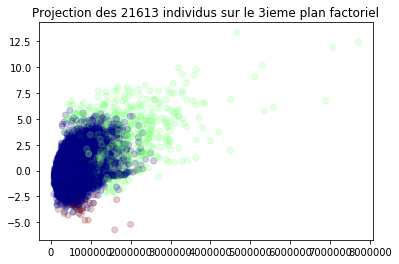

In [37]:
plt.scatter(data['price'], Y_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 3ieme plan factoriel".format(Y_projected.shape[0]))
plt.show(block=False)

In [41]:
print(len([i for i in clusters if i == 1]))

43


In [42]:
a1 = []
a2 = []
a3 = []
a4 = []
a5 = []
a6 = []

for i in range(data['price'].shape[0]):
    if clusters[i] == 0:
        a1.append(data['price'][i])
    if clusters[i] == 1:
        a2.append(data['price'][i])
    if clusters[i] == 2:
        a3.append(data['price'][i])
    if clusters[i] == 3:
        a4.append(data['price'][i])
    if clusters[i] == 4:
        a5.append(data['price'][i])
    if clusters[i] == 5:
        a6.append(data['price'][i])
        
result_partition = np.array([a1, a2, a3, a4, a5, a6])

In [43]:
print(result_partition.shape)
print(len(result_partition[0]))
print(len(result_partition[1]))
print(len(result_partition[2]))
print(len(result_partition[3]))
print(len(result_partition[4]))
print(len(result_partition[5]))

(6,)
20996
43
574
0
0
0


In [44]:
print(min(result_partition[0]))
print(max(result_partition[0]))

75000.0
2575000.0


In [45]:
print(min(result_partition[1]))
print(max(result_partition[1]))

190000.0
2140000.0


In [46]:
print(min(result_partition[2]))
print(max(result_partition[2]))

285000.0
7700000.0


In [176]:
print(min(result_partition[3]))
print(max(result_partition[3]))

257000.0
6885000.0


In [177]:
print(min(result_partition[4]))
print(max(result_partition[4]))

180000.0
2280000.0


In [178]:
print(min(result_partition[5]))
print(max(result_partition[5]))

ValueError: min() arg is an empty sequence

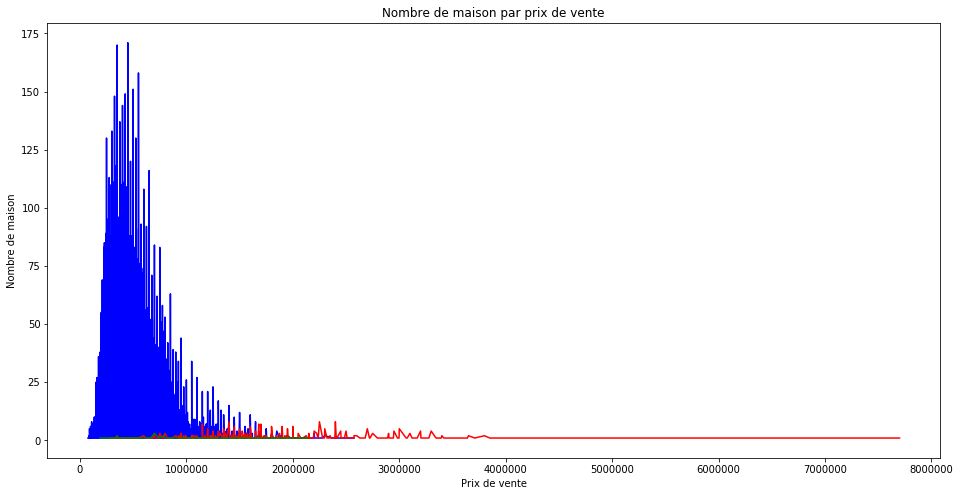

In [49]:
from collections import Counter, defaultdict

price1 = defaultdict(int)
for nbre in result_partition[0]:
    price1[nbre] += 1
price1 = sorted(price1.items(), key=lambda x: x[0])

price2 = defaultdict(int)
for nbre in result_partition[1]:
    price2[nbre] += 1
price2 = sorted(price2.items(), key=lambda x: x[0])

price3 = defaultdict(int)
for nbre in result_partition[2]:
    price3[nbre] += 1
price3 = sorted(price3.items(), key=lambda x: x[0])

price4 = defaultdict(int)
for nbre in result_partition[3]:
    price4[nbre] += 1
price4 = sorted(price4.items(), key=lambda x: x[0])

price5 = defaultdict(int)
for nbre in result_partition[4]:
    price5[nbre] += 1
price5 = sorted(price5.items(), key=lambda x: x[0])

price6 = defaultdict(int)
for nbre in result_partition[5]:
    price6[nbre] += 1
price6 = sorted(price6.items(), key=lambda x: x[0])

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

axes.plot([x for (x,y) in price1], [y for (x,y) in price1], color="blue", linestyle="solid")
axes.plot([x for (x,y) in price3], [y for (x,y) in price3], color="red", linestyle="solid")
axes.plot([x for (x,y) in price2], [y for (x,y) in price2], color="green", linestyle="solid")
#plt.ylim(0, 700)
axes.set_title("Nombre de maison par prix de vente")
axes.set_ylabel("Nombre de maison")
axes.set_xlabel("Prix de vente")
fig.savefig('price.png', transparent = True)
#plt.show()
#plt.close()

In [155]:
Q1 = round(np.percentile(data['price'], 25))

In [156]:
Q3 = round(np.percentile(data['price'], 75))

In [158]:
IQ = Q3 - Q1
print("L ecart interquartile vaut : ", IQ)

L ecart interquartile vaut :  323050.0


In [162]:
print((max(data['price']) - min(data['price']))/(2 * IQ * len(data['price'])**(-1/3)) )

328.73437891000515
